In [1]:
# Si requiere instalar lo siguiente desde requirements.txt
# También se puede quitar el signo #

#!pip install -r requirements.txt
#!pip install tensorflow
#!pip install numpy
#!pip install pandas
#!pip install matplotlib
#!pip install scikit-learn

In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import datasets

In [3]:
# Anemia type prediction based on CBC data
# CBC (Complete Blood Count) is an essential comprehensive blood panel that
# allows your doctor to evaluate each type of cell in your blood.
#https://www.kaggle.com/datasets/ehababoelnaga/anemia-types-classification?resource=download

df = pd.read_csv('diagnosed_cbc_data_v4.csv')
df.head()

,WBC,LYMp,NEUTp,LYMn,NEUTn,RBC,HGB,HCT,MCV,MCH,MCHC,PLT,PDW,PCT,Diagnosis
0,10.0,43.2,50.1,4.3,5.0,2.77,7.3,24.2,87.7,26.3,30.1,189.0,12.5,0.17,Normocytic hypochromic anemia
1,10.0,42.4,52.3,4.2,5.3,2.84,7.3,25.0,88.2,25.7,20.2,180.0,12.5,0.16,Normocytic hypochromic anemia
2,7.2,30.7,60.7,2.2,4.4,3.97,9.0,30.5,77.0,22.6,29.5,148.0,14.3,0.14,Iron deficiency anemia
3,6.0,30.2,63.5,1.8,3.8,4.22,3.8,32.8,77.9,23.2,29.8,143.0,11.3,0.12,Iron deficiency anemia
4,4.2,39.1,53.7,1.6,2.3,3.93,0.4,316.0,80.6,23.9,29.7,236.0,12.8,0.22,Normocytic hypochromic anemia


Data Dictionary:

*HGB: The amount of hemoglobin in the blood,
crucial for oxygen transport.
*PlT: The number of platelets in the blood, involved in blood clotting.
*WBC: The count of white blood cells, vital for immune response.
*RBC: The count of red blood cells, responsible for oxygen transport.
*MCV (Mean Corpuscular Volume): Average volume of a single red blood cell.
*MCH (Mean Corpuscular Hemoglobin): Average amount of hemoglobin per red blood cell.
*MCHC (Mean Corpuscular Hemoglobin Concentration): Average concentration of hemoglobin in red blood cells.
*PDW: a measurement of the variability in platelet size distribution in the blood
*PCT: A procalcitonin test can help your health care provider diagnose if you have sepsis from a bacterial infection or if you have a high risk of developing sepsis
*Diagnosis: Anemia type based on the CBC parameters

In [4]:
# revisando cuantos valores hay por cada clase
counts = df["Diagnosis"].value_counts()
print (counts)

Diagnosis
Healthy                           336
Normocytic hypochromic anemia     279
Normocytic normochromic anemia    269
Iron deficiency anemia            189
Thrombocytopenia                   73
Other microcytic anemia            59
Leukemia                           47
Macrocytic anemia                  18
Leukemia with thrombocytopenia     11
Name: count, dtype: int64


In [5]:
df1 = df.copy()

# reemplazar la columna gender por números para el clasificador
df1["Diagnosis"] = df1["Diagnosis"].replace({"Healthy": 0,
                   "Normocytic hypochromic anemia": 1,
                   "Normocytic normochromic anemia": 2,
                   "Iron deficiency anemia": 3, "Thrombocytopenia": 4,
                   "Other microcytic anemia": 5, "Leukemia": 6,
                   "Macrocytic anemia": 7, "Leukemia with thrombocytopenia": 8})
df1.head()

,WBC,LYMp,NEUTp,LYMn,NEUTn,RBC,HGB,HCT,MCV,MCH,MCHC,PLT,PDW,PCT,Diagnosis
0,10.0,43.2,50.1,4.3,5.0,2.77,7.3,24.2,87.7,26.3,30.1,189.0,12.5,0.17,1
1,10.0,42.4,52.3,4.2,5.3,2.84,7.3,25.0,88.2,25.7,20.2,180.0,12.5,0.16,1
2,7.2,30.7,60.7,2.2,4.4,3.97,9.0,30.5,77.0,22.6,29.5,148.0,14.3,0.14,3
3,6.0,30.2,63.5,1.8,3.8,4.22,3.8,32.8,77.9,23.2,29.8,143.0,11.3,0.12,3
4,4.2,39.1,53.7,1.6,2.3,3.93,0.4,316.0,80.6,23.9,29.7,236.0,12.8,0.22,1


In [6]:
# revisando cuantos valores hay por cada clase
counts = df1["Diagnosis"].value_counts()
print (counts)

Diagnosis
0    336
1    279
2    269
3    189
4     73
5     59
6     47
7     18
8     11
Name: count, dtype: int64


In [7]:
#Any missing values?

df.isnull().sum()

WBC          0
LYMp         0
NEUTp        0
LYMn         0
NEUTn        0
RBC          0
HGB          0
HCT          0
MCV          0
MCH          0
MCHC         0
PLT          0
PDW          0
PCT          0
Diagnosis    0
dtype: int64

In [8]:
#Checking data types

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1281 entries, 0 to 1280
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   WBC        1281 non-null   float64
 1   LYMp       1281 non-null   float64
 2   NEUTp      1281 non-null   float64
 3   LYMn       1281 non-null   float64
 4   NEUTn      1281 non-null   float64
 5   RBC        1281 non-null   float64
 6   HGB        1281 non-null   float64
 7   HCT        1281 non-null   float64
 8   MCV        1281 non-null   float64
 9   MCH        1281 non-null   float64
 10  MCHC       1281 non-null   float64
 11  PLT        1281 non-null   float64
 12  PDW        1281 non-null   float64
 13  PCT        1281 non-null   float64
 14  Diagnosis  1281 non-null   object 
dtypes: float64(14), object(1)
memory usage: 150.2+ KB


In [9]:
#Any duplicate rows?
#df1 = df.copy() se comenta porque antes se hizo la copia

n_dup = len(df1) - len(df1.drop_duplicates())

print(f"Number of duplicate rows: {n_dup}")

if n_dup > 0:
   # Eliminar filas duplicadas
   df = df1.drop_duplicates()
   n_dup = len(df1) - len(df1.drop_duplicates())
   print(f"Number of duplicate rows: {n_dup}")

Number of duplicate rows: 49
Number of duplicate rows: 49


In [10]:
dataset = df1.values
dataset



array([[10.        , 43.2       , 50.1       , ..., 12.5       ,
         0.17      ,  1.        ],
       [10.        , 42.4       , 52.3       , ..., 12.5       ,
         0.16      ,  1.        ],
       [ 7.2       , 30.7       , 60.7       , ..., 14.3       ,
         0.14      ,  3.        ],
       ...,
       [ 9.2       , 25.845     , 77.511     , ..., 14.31251157,
         0.26028   ,  0.        ],
       [ 6.48      , 25.845     , 77.511     , ..., 14.31251157,
         0.26028   ,  0.        ],
       [ 8.8       , 25.845     , 77.511     , ..., 14.31251157,
         0.26028   ,  0.        ]])

In [11]:
# Asignando todas las columnas excepto la última a X
X = dataset[:, :-1]

# Configurar la opción para mostrar números completos
np.set_printoptions(suppress=True)

# Imprimir el array sin notación científica
#print(X)
X


array([[ 10.        ,  43.2       ,  50.1       , ..., 189.        ,
         12.5       ,   0.17      ],
       [ 10.        ,  42.4       ,  52.3       , ..., 180.        ,
         12.5       ,   0.16      ],
       [  7.2       ,  30.7       ,  60.7       , ..., 148.        ,
         14.3       ,   0.14      ],
       ...,
       [  9.2       ,  25.845     ,  77.511     , ..., 329.        ,
         14.31251157,   0.26028   ],
       [  6.48      ,  25.845     ,  77.511     , ..., 174.        ,
         14.31251157,   0.26028   ],
       [  8.8       ,  25.845     ,  77.511     , ..., 279.        ,
         14.31251157,   0.26028   ]])

In [12]:
# Obteniendo el número de filas
num_filas = len(X)

# Imprimiendo el número de filas
print(f"X tiene {num_filas} filas.")

X tiene 1281 filas.


In [13]:
# Asignando la última columna a y
y = dataset[:, -1]
y

array([1., 1., 3., ..., 0., 0., 0.])

In [14]:
min_value = np.min(y)
max_value = np.max(y)
print("Valor mínimo en y:", min_value)
print("Valor máximo en y:", max_value)

Valor mínimo en y: 0.0
Valor máximo en y: 8.0


In [15]:
# Obteniendo el número de filas
num_filas = len(y)

# Imprimiendo el número de filas
print(f"y tiene {num_filas} filas.")

y tiene 1281 filas.


We then have 1281 rows, each of which represents a Anemia Types. Anemia Types has 14 features we can use for our prediction, and each Anemia Types belongs to 1 of 8 types, represented by the number 0 through 7. The task for our neural network is to train with this dataset and then predict the type of Anemia that the neural network has not seen before.


In [16]:
# Let's get a train and test set. We'll use 20% of our database (30 flowers) as a test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train

array([[  4.5       ,  25.8       ,  64.4       , ..., 128.        ,
         12.8       ,   0.12      ],
       [  7.4       ,  25.845     ,  77.511     , ..., 280.        ,
         13.6       ,   0.26028   ],
       [  7.2       ,  25.845     ,  77.511     , ..., 330.        ,
         25.        ,   0.26028   ],
       ...,
       [ 10.31      ,  25.845     ,  77.511     , ..., 179.        ,
         14.31251157,   0.26028   ],
       [  5.9       ,  25.845     ,  77.511     , ..., 200.        ,
         13.3       ,   0.26028   ],
       [  9.09      ,  25.845     ,  77.511     , ..., 230.        ,
         14.31251157,   0.26028   ]])

The first step when using Tensorflow is to initialize the model. The model we saw in previous examples is a "Sequential" model, so we will ask Tensorflow to initialize it without any layers at first.

In [17]:
# First, we initialize the model.
model = tf.keras.models.Sequential()

Now, we will add our layers to this empty model. We will first add our input layer, then a couple of hidden layers, and finally our output layer. Notice how we chose to use ReLU functions as our activation function, but we could have just as well chosen one of many others. We choose 10 neurons as our width for no particular reason. Usually, a larger model gives better results, but needs more and more diverse data to work well.

In [18]:
# First our input layer. For this layer, and this layer only, we need to specify the size of our input. For our dataset this means the amount of columns in our X.
model.add(tf.keras.layers.Dense(10, activation=tf.nn.relu, input_shape=(X.shape[1],)))
# Now some hidden layers
model.add(tf.keras.layers.Dense(10, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.relu))
# Finally, our output layer. Since we have 9 possible types, we need 9 output neurons.
# For a regression problem, we would have only 1. For an image creation network, we would have as many pixels as the image we wanted to create!
model.add(tf.keras.layers.Dense(9))
# A final layer with several output neurons gives us logits as results. We can do a final pass with a Softmax layer to turn them into percentages.
model.add(tf.keras.layers.Softmax())

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Now, we will decide on an _optimizer_. The optimizer is the algorithm which determines how much we move each weight down the slope we found by backpropagation. There are many possible choices, most of which are based on Stochastic Gradient Descent. [One of the most popular ones right now is "Adam"](https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/#:~:text=Adam%20is%20an%20optimization%20algorithm,iterative%20based%20in%20training%20data.&text=The%20algorithm%20is%20called%20Adam.), so that's the one we will use. The word "stochastic" means random process. That is why neural networks don't always get the same results even if you train them twice on exactly the same data with the same parameters. Making the process random makes it quicker, but less reliable. SGD and its child algorithms are a large part of the reason why training neural networks is now feasible.

The __learning rate__ is the amount of space we expect to move down the slope on each cycle of learning. The larger this number, the more we move, but the less precise the movement.

<table>
  <tr><td>
    <img src="media/optims.gif" width="70%"
         alt="Optimization algorithms visualized over time in 3D space.">
  </td></tr>
  <tr><td align="center">
   Optimization algorithms visualized over time in 3D space.<br/>(Source: <a href="http://cs231n.github.io/neural-networks-3/">Stanford class CS231n</a>, MIT License, Image credit: <a href="https://twitter.com/alecrad">Alec Radford</a>)
  </td></tr>
</table>

In [19]:
optim = tf.keras.optimizers.Adam(learning_rate=0.01)

Finally, we compile our final model and train with our data. Notice how we need to define a loss function, but we can also calculate other additional metrics to keep tabs on how our model is doing. The reason we can't use accuracy as our loss function is because the loss function _must_ be differentiable in order for backpropagation to work.

We also define a batch size: This is the amount of example we feed into our model at a time. You usually want this to be a power of 2, due to the way GPUs process data. 32 is a good starting point.

In [20]:
print(y_train)
min_value = np.min(y_train)
max_value = np.max(y_train)
print("Valor mínimo en y_train:", min_value)
print("Valor máximo en y_train:", max_value)

[1. 2. 0. ... 2. 5. 1.]
Valor mínimo en y_train: 0.0
Valor máximo en y_train: 8.0


In [21]:
# Verificar valores únicos
unique_labels = np.unique(y_train)
print("Valores únicos en y_train:", unique_labels)

# Verificar rango
min_value = np.min(y_train)
max_value = np.max(y_train)
print("Valor mínimo en y_train:", min_value)
print("Valor máximo en y_train:", max_value)

Valores únicos en y_train: [0. 1. 2. 3. 4. 5. 6. 7. 8.]
Valor mínimo en y_train: 0.0
Valor máximo en y_train: 8.0


In [22]:
# Ajustar valores negativos a un valor válido (por ejemplo, 0)
#y_train_adjusted = np.where(y_train < 0, 0, y_train)

# Verificar valores únicos
#unique_labels = np.unique(y_train_adjusted)
#print("Valores únicos en y_train ajustado:", unique_labels)

# Verificar rango
#min_value = np.min(y_train_adjusted)
#max_value = np.max(y_train_adjusted)
#print("Valor mínimo en y_train ajustado:", min_value)
#print("Valor máximo en y_train ajustado:", max_value)

In [23]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    optimizer=optim,metrics=['accuracy'])
history = model.fit(X_train, y_train,
        validation_data=(X_test, y_test),
        epochs = 20,
        batch_size=32)

Epoch 1/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.2168 - loss: 14.5164 - val_accuracy: 0.2296 - val_loss: 2.2499
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2706 - loss: 2.5126 - val_accuracy: 0.2451 - val_loss: 1.8378
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3052 - loss: 1.8935 - val_accuracy: 0.3969 - val_loss: 1.5394
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4014 - loss: 1.6354 - val_accuracy: 0.4163 - val_loss: 1.4826
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4243 - loss: 1.5638 - val_accuracy: 0.4708 - val_loss: 1.5038
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4665 - loss: 1.4636 - val_accuracy: 0.4825 - val_loss: 1.5164
Epoch 7/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4827 - loss: 1.5218 - val_accuracy: 0.4475 - val_loss: 1.5003
Epoch 8/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4500 - loss: 1.4920 - val_accuracy: 0.4475 - val_los

Our model is now trained! We can see both the performance it had vs the data it was training on (`loss` and `accuracy`), and its performance vs the test data as it trained (`val_loss` and `val_accuracy`). This history an be easily saved since the `.fit()` method returns the results for each epoch.

In [24]:
history.history

{'accuracy': [0.236328125,
  0.2880859375,
  0.326171875,
  0.4111328125,
  0.4287109375,
  0.4541015625,
  0.4638671875,
  0.4453125,
  0.4228515625,
  0.4609375,
  0.49609375,
  0.50390625,
  0.455078125,
  0.51953125,
  0.5068359375,
  0.490234375,
  0.5146484375,
  0.5517578125,
  0.5615234375,
  0.576171875],
 'loss': [8.369799613952637,
  2.4705874919891357,
  1.807314157485962,
  1.6516693830490112,
  1.5889310836791992,
  1.5332766771316528,
  1.4874553680419922,
  1.5259814262390137,
  1.581877589225769,
  1.5244355201721191,
  1.4460002183914185,
  1.4052479267120361,
  1.467743158340454,
  1.3952351808547974,
  1.3654940128326416,
  1.4016040563583374,
  1.3658684492111206,
  1.2700542211532593,
  1.269904375076294,
  1.2181018590927124],
 'val_accuracy': [0.22957198321819305,
  0.24513618648052216,
  0.3968871533870697,
  0.4163424074649811,
  0.47081711888313293,
  0.48249027132987976,
  0.4474708139896393,
  0.4474708139896393,
  0.42412450909614563,
  0.5369649529457092,

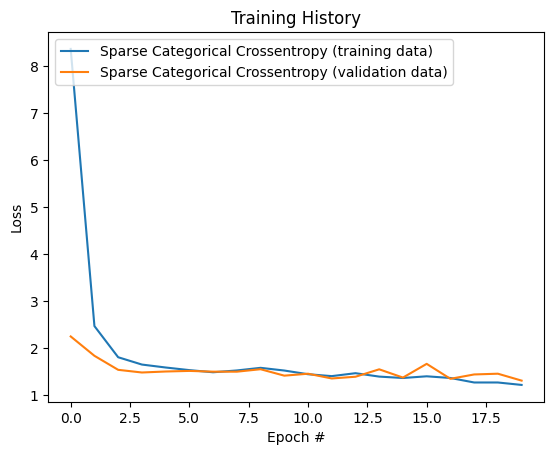

In [25]:
# Plot history
plt.plot(history.history['loss'], label='Sparse Categorical Crossentropy (training data)')
plt.plot(history.history['val_loss'], label='Sparse Categorical Crossentropy (validation data)')
plt.title('Training History')
plt.ylabel('Loss')
plt.xlabel('Epoch #')
plt.legend(loc="upper left")
plt.show()

Finally, we can use our model to make predictions! This is as easy as calling the `.predict()` method, with a list of examples to get a prediction out of.

In [26]:
# Let's get the prediction for the first flower in the test set
model.predict(X_test[:1])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


array([[0.2024955 , 0.23702672, 0.105614  , 0.09571119, 0.10692365,
        0.05424707, 0.13306566, 0.03743922, 0.02747699]], dtype=float32)

Since we used a Softmax function in our model, the predictions return a list of probabilities which add up to one. Each probability corresponds to how confident our model is that the flower corresponds to a particular species. We can grab the highest of these predictions as our actual species, and compare it to the real one:

In [27]:
predictions = model.predict(X_test)
for idx, prediction in enumerate(predictions):
    print('We predict: '+str(np.argmax(prediction))+'. Real Types was: '+str(y_test[idx]))

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
We predict: 1. Real Types was: 2.0
We predict: 0. Real Types was: 0.0
We predict: 1. Real Types was: 2.0
We predict: 1. Real Types was: 5.0
We predict: 2. Real Types was: 2.0
We predict: 0. Real Types was: 0.0
We predict: 1. Real Types was: 3.0
We predict: 4. Real Types was: 2.0
We predict: 1. Real Types was: 1.0
We predict: 1. Real Types was: 1.0
We predict: 0. Real Types was: 0.0
We predict: 0. Real Types was: 6.0
We predict: 4. Real Types was: 8.0
We predict: 0. Real Types was: 0.0
We predict: 0. Real Types was: 1.0
We predict: 2. Real Types was: 1.0
We predict: 1. Real Types was: 3.0
We predict: 4. Real Types was: 3.0
We predict: 0. Real Types was: 0.0
We predict: 0. Real Types was: 0.0
We predict: 2. Real Types was: 2.0
We predict: 0. Real Types was: 0.0
We predict: 0. Real Types was: 0.0
We predict: 1. Real Types was: 4.0
We predict: 2. Real Types was: 2.0
We predict: 0. Real Types was: 0.0
We predict: 1. Real Types was: 5.0
We predict: 0. Re

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Matriz de confusión (sklearn):
[[80  0  1  0  0  0  0  0  0]
 [19 25  6  3  3  0  0  0  0]
 [ 7  8 26  1  4  0  0  0  0]
 [ 2 14  3 13  2  0  0  0  0]
 [ 7  8  0  0  2  0  0  0  0]
 [ 1 10  2  1  0  0  0  0  0]
 [ 5  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0]
 [ 1  1  0  0  1  0  0  0  0]]
Clases únicas en y_test: [0. 1. 2. 3. 4. 5. 6. 7. 8.]
Clases únicas en y_pred: [0 1 2 3 4]
Reporte de clasificación:
              precision    recall  f1-score   support

         0.0       0.66      0.99      0.79        81
         1.0       0.38      0.45      0.41        56
         2.0       0.67      0.57      0.61        46
         3.0       0.72      0.38      0.50        34
         4.0       0.17      0.12      0.14        17
         5.0       0.00      0.00      0.00        14
         6.0       0.00      0.00      0.00         5
         7.0       0.00      0.00      0.00         1
         8.0       0.00      0.00      0.00         3

 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


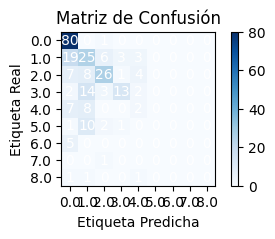


Cálculo utilizando librerias
TP: 25
TN: 80
FP: 0
FN: 19
Precisión (sklearn): 0.5680933852140078
Sensibilidad (sklearn): 0.5680933852140078
Especificidad (sklearn): 1.0


In [28]:
# Matriz de confusión utilizando librerias
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression as SklearnLogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

# Obtener matriz de confusión utilizando sklearn
conf_matrix = confusion_matrix(y_test, y_pred)

# Imprimir la matriz de confusión para inspección
print("Matriz de confusión (sklearn):")
print(conf_matrix)

# Imprimir las clases únicas presentes en y_test
print("Clases únicas en y_test:", np.unique(y_test))

# Imprimir las clases únicas presentes en y_pred
print("Clases únicas en y_pred:", np.unique(y_pred))

# Calcular métricas de evaluación
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))

# Visualizar la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 2))  # Reducir el tamaño de la figura
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Matriz de Confusión")
plt.colorbar()
plt.xticks(np.arange(len(np.unique(y_test))), np.unique(y_test))
plt.yticks(np.arange(len(np.unique(y_test))), np.unique(y_test))
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Real')
for i in range(len(np.unique(y_test))):
    for j in range(len(np.unique(y_test))):
        plt.text(j, i, conf_matrix[i, j], ha="center", va="center", color="white")
plt.show()

# Extract TP, TN, FP, FN from the confusion matrix
TP = conf_matrix[1, 1]
TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]

print()
print("Cálculo utilizando librerias")
print("TP:", TP)
print("TN:", TN)
print("FP:", FP)
print("FN:", FN)

# Calcular precisión, sensibilidad y especificidad utilizando sklearn
precision_sklearn = precision_score(y_test, y_pred, average='micro')
sensibilidad_sklearn = recall_score(y_test, y_pred, average='micro')  # Recall es lo mismo que sensibilidad
# Calcular especificidad utilizando sklearn
especificidad_sklearn = TN / (TN + FP) if (TN + FP) > 0 else 0

print("Precisión (sklearn):", precision_sklearn)
print("Sensibilidad (sklearn):", sensibilidad_sklearn)
print("Especificidad (sklearn):", especificidad_sklearn)

Clases encontradas: [0. 1. 2. 3. 4. 5. 6. 7. 8.]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


ROC AUC Score:  0.940712229661131


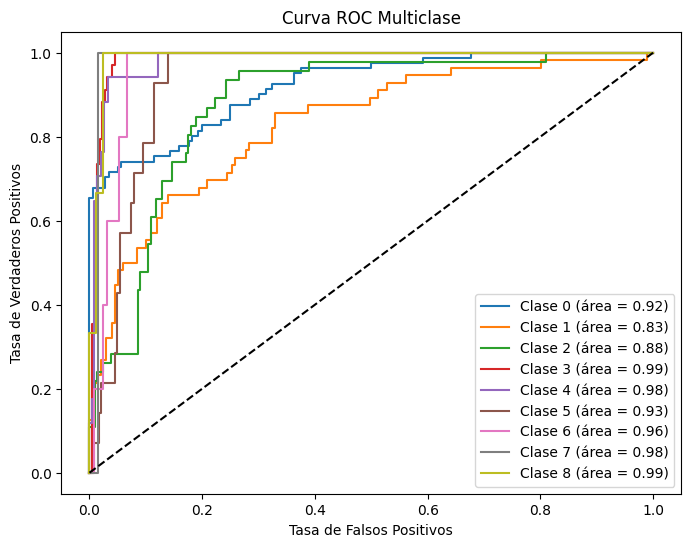

In [29]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Verificar las clases presentes en los datos de entrenamiento y prueba
classes = np.unique(y_train)
print("Clases encontradas:", classes)

# Binarizar las etiquetas
y_train_bin = label_binarize(y_train, classes=classes)
y_test_bin = label_binarize(y_test, classes=classes)

# Entrenar el modelo
model = LogisticRegression(multi_class='ovr', max_iter=1000)
model.fit(X_train, y_train)

# Hacer predicciones
y_scores = model.predict_proba(X_test)

# Calcular el ROC AUC score para multiclase
roc_auc = roc_auc_score(y_test_bin, y_scores, multi_class='ovr')
print("ROC AUC Score: ", roc_auc)

# Dibujar la curva ROC para cada clase
fig, ax = plt.subplots(figsize=(8, 6))

for i in range(y_test_bin.shape[1]):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_scores[:, i])
    plt.plot(fpr, tpr, label=f'Clase {i} (área = {roc_auc_score(y_test_bin[:, i], y_scores[:, i]):.2f})')

# Dibujar la línea diagonal (clasificación aleatoria)
plt.plot([0, 1], [0, 1], 'k--')

# Configurar el gráfico
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC Multiclase')
plt.legend(loc="lower right")
plt.show()


In [35]:
#Instalar scikeras si no está instalado
!pip install scikeras

In [43]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV, train_test_split
from scikeras.wrappers import KerasClassifier
import matplotlib.pyplot as plt

# Cargar y procesar los datos
df = pd.read_csv('diagnosed_cbc_data_v4.csv')
df["Diagnosis"] = df["Diagnosis"].replace({"Healthy": 0,
                                           "Normocytic hypochromic anemia": 1,
                                           "Normocytic normochromic anemia": 2,
                                           "Iron deficiency anemia": 3,
                                           "Thrombocytopenia": 4,
                                           "Other microcytic anemia": 5,
                                           "Leukemia": 6,
                                           "Macrocytic anemia": 7,
                                           "Leukemia with thrombocytopenia": 8})

# Eliminar filas duplicadas si las hay
df = df.drop_duplicates()

# Asignar todas las columnas excepto la última a X
X = df.iloc[:, :-1].values
# Asignar la última columna a y
y = df.iloc[:, -1].values

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir el modelo de Keras
def create_model(optimizer='adam'):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Input(shape=(X.shape[1],)),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(9, activation='softmax')
    ])
    model.compile(
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
        optimizer=optimizer,
        metrics=['accuracy']
    )
    return model

# Función para evaluar el modelo con parámetros dados
def evaluate_model(X_train, y_train, X_test, y_test, optimizers, epochs_list, batch_sizes):
    model = KerasClassifier(model=create_model, verbose=0)

    param_grid = {
        'optimizer': optimizers,
        'epochs': epochs_list,
        'batch_size': batch_sizes
    }

    grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
    grid_result = grid.fit(X_train, y_train)

    best_model = grid_result.best_estimator_
    y_pred = best_model.predict(X_test)

    conf_matrix = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')

    tn = conf_matrix.sum(axis=1) - np.diag(conf_matrix)
    fp = conf_matrix.sum(axis=0) - np.diag(conf_matrix)
    specificity = tn / (tn + fp)

    summary = pd.DataFrame({
        'Parameter': ['Optimizer', 'Epochs', 'Batch Size'],
        'Value': [grid_result.best_params_['optimizer'], grid_result.best_params_['epochs'], grid_result.best_params_['batch_size']],
        'Accuracy': [accuracy, None, None],
        'Precision': [precision, None, None],
        'Recall (Sensitivity)': [recall, None, None],
        'Specificity': [np.mean(specificity), None, None]
    })

    print("\nMatriz de Confusión:")
    print(conf_matrix)
    print("\nReporte de Clasificación:")
    print(classification_report(y_test, y_pred))

    return summary

# Hiperparámetros a probar
optimizers = ['adam', 'rmsprop', 'sgd']
epochs_list = [20, 30, 40]
batch_sizes = [32, 64, 128]

# Evaluar el modelo
summary = evaluate_model(X_train, y_train, X_test, y_test, optimizers, epochs_list, batch_sizes)
print(summary)

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(



Matriz de Confusión:
[[61  0  0  0  0  0  0  0  0]
 [25 15  6  4  1  0  1  0  1]
 [ 9  3 35  1  3  1  1  0  0]
 [ 1  5  2 25  1  2  1  0  1]
 [ 3  0  1  0 14  0  0  1  0]
 [ 0  0  2  1  0  6  0  0  0]
 [ 3  1  0  0  0  0  3  0  0]
 [ 0  1  0  0  0  0  0  2  0]
 [ 1  0  0  0  1  0  0  0  2]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.59      1.00      0.74        61
           1       0.60      0.28      0.38        53
           2       0.76      0.66      0.71        53
           3       0.81      0.66      0.72        38
           4       0.70      0.74      0.72        19
           5       0.67      0.67      0.67         9
           6       0.50      0.43      0.46         7
           7       0.67      0.67      0.67         3
           8       0.50      0.50      0.50         4

    accuracy                           0.66       247
   macro avg       0.64      0.62      0.62       247
weighted avg       0.67      0